# Mall customers segmentation
https://www.kaggle.com/datasets/shwetabh123/mall-customers?resource=download

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Data analysis

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df = df.set_index('CustomerID')
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df['Gender'] = np.where(df['Genre'] == 'Male', 1, 0)
df = df.drop(['Genre'], axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


## Gender Visualization

<AxesSubplot:>

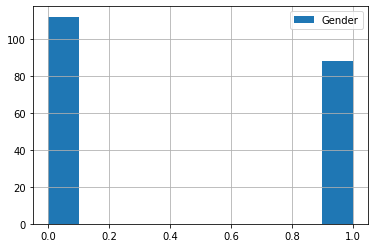

In [7]:
df['Gender'].hist(legend=True)

## Age Visualization

In [8]:
ages = df['Age'].value_counts()
df['Age'].value_counts().sort_values(ascending=False)

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
50     5
21     5
48     5
29     5
20     5
34     5
24     4
18     4
28     4
67     4
59     4
54     4
37     3
68     3
46     3
25     3
22     3
60     3
33     3
39     3
45     3
43     3
41     2
65     2
58     2
51     2
70     2
63     2
42     2
53     2
26     2
57     2
66     2
44     2
52     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

<BarContainer object of 51 artists>

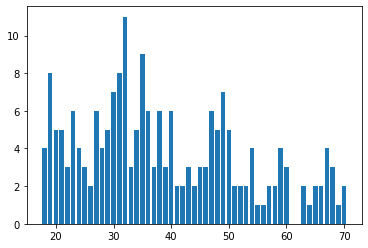

In [9]:
plt.bar(ages.index, ages)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde0215490>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde0215af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde02151c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde0215fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde02232e0>],
 'means': []}

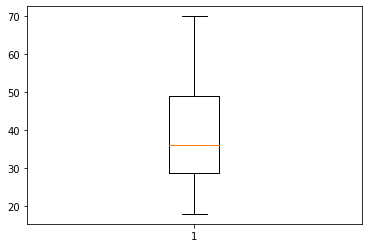

In [10]:
plt.boxplot(df['Age'])

## Annual Income

In [11]:
income = df['Annual Income (k$)'].value_counts()
income.head()

54    12
78    12
48     6
71     6
63     6
Name: Annual Income (k$), dtype: int64

<BarContainer object of 64 artists>

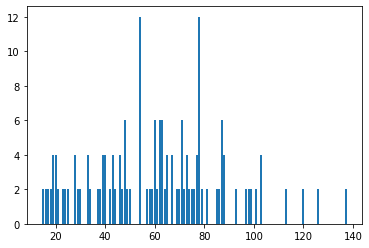

In [12]:
plt.bar(income.index, income)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde036a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde036a970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde036a220>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde036af10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde0375220>],
 'means': []}

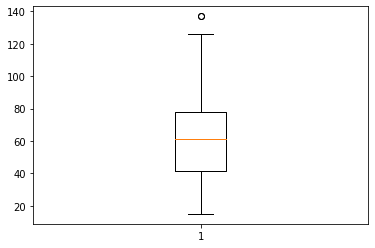

In [13]:
plt.boxplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

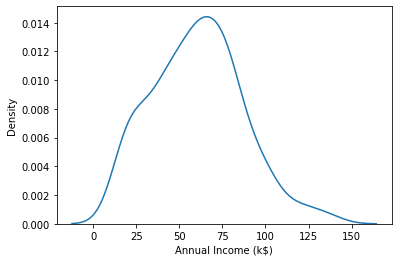

In [14]:
sns.kdeplot(df['Annual Income (k$)'])

## Spending Score

<BarContainer object of 84 artists>

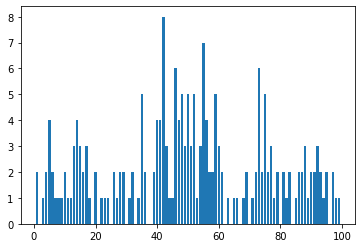

In [15]:
spending = df['Spending Score (1-100)'].value_counts()
plt.bar(spending.index, spending)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde2999430>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde29999d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde2999160>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde2999f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde29a3280>],
 'means': []}

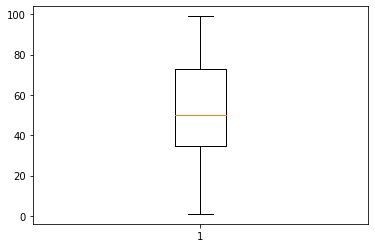

In [16]:
plt.boxplot(df['Spending Score (1-100)'])

## K-means

Data scaling

In [17]:
num_cols = df.drop(['Gender'], axis=1).columns.tolist()
num_cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [18]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.loc[:][num_cols])
df_scaled = pd.DataFrame(data=data_scaled, index=df.index, columns=num_cols)
df_scaled['Gender'] = df['Gender']
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1
2,-1.281035,-1.738999,1.195704,1
3,-1.352802,-1.700830,-1.715913,0
4,-1.137502,-1.700830,1.040418,0
5,-0.563369,-1.662660,-0.395980,0


In [19]:
clusters_list = range(2, 10)

scores = []
for n_clusters in clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    predictions = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, predictions)
    scores.append(score)

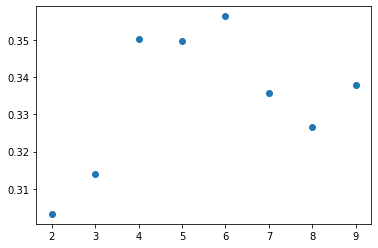

In [20]:
plt.scatter(clusters_list, scores)

In [21]:
opt_n_clusters = 6

## Vizualization

In [22]:
from sklearn.decomposition import PCA

In [23]:
kmeans = KMeans(n_clusters=6)
predictions = kmeans.fit_predict(df_scaled)

In [24]:
pca = PCA(n_components=2)
pca.fit(df_scaled, predictions)
pca.explained_variance_ratio_

array([0.4095285, 0.3081674])

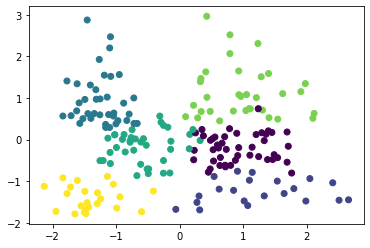

In [25]:
df_scaled_pca = pca.transform(df_scaled)
plt.scatter(df_scaled_pca[:, 0], df_scaled_pca[:, 1], c=predictions)